# Bivariate Analysis, EDA

### Number of Columns = 642
### Number of Features = 639 (X1 ~ X639)
### Two Keys: X640, X641
### Label: X642
### Fraction of 1 in the label: 0.12188324456512759 

In [230]:
import re
import sys, os
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ipywidgets as widgets
from ipywidgets import interact, interactive

In [231]:
path = os.getcwd()
df = pd.read_csv(os.path.join(path, "Capstone_data_Jan19_Nov19.csv"))

/Users/iriswei/opt/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (59,66,85,95,512,513,514,515,516,517,518,519,520,521,522,529,531,536,539) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [232]:
np.shape(df)

(181559, 642)

In [233]:
df.describe()

,X640,X641,X642,X1,X2,X3,X4,X5,X6,X7,...,X630,X631,X632,X633,X634,X635,X636,X637,X638,X639
count,181559.000000,181559.000000,181559.000000,181559.000000,181559.000000,181559.000000,181559.000000,181488.000000,181539.000000,151517.000000,...,335.000000,701.000000,240.000000,264.000000,313.000000,22.000000,1556.000000,11623.00000,3.0,244.000000
mean,127261.428224,126991.458149,0.121883,0.003008,0.002189,1977.252882,0.002560,27.714337,169.578394,116.451175,...,1.044776,1.037090,1.045833,1.056818,1.054313,1.181818,1.108612,1.19969,1.0,1.032787
std,60347.952389,60288.035820,0.327152,1.001611,1.062163,12.876886,1.070066,30.727206,10.517133,11.632175,...,0.207121,0.189117,0.228657,0.315311,0.226997,0.501081,0.348303,0.49983,0.0,0.178444
min,1.000000,101.000000,0.000000,-1.839451,-0.380150,1928.000000,-0.346350,0.166391,7.620000,80.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.000000
25%,83842.500000,83643.500000,0.000000,-0.750200,-0.309136,1969.000000,-0.279328,23.625289,162.560000,109.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.000000
50%,130089.000000,129805.000000,0.000000,-0.127771,-0.184861,1979.000000,-0.167626,26.700832,170.180000,116.666667,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.000000
75%,176017.500000,175690.500000,0.000000,0.650265,0.045936,1987.000000,0.018545,30.638680,177.800000,123.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.000000
max,229878.000000,229529.000000,1.000000,3.762411,212.662659,2001.000000,133.689355,12497.777778,299.720000,223.333333,...,2.000000,2.000000,3.000000,4.000000,2.000000,3.000000,4.000000,7.00000,1.0,2.000000


### Basic Statistics

In [234]:
print(f'Fraction of label = 1 is {np.mean(df["X642"])}')

Fraction of label = 1 is 0.12188324456512759


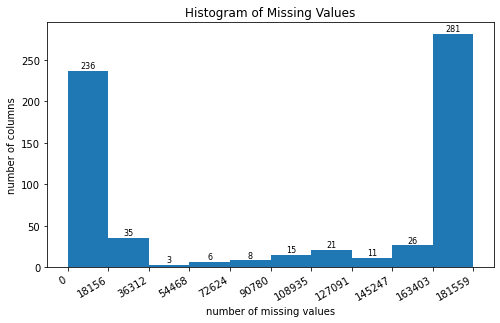

In [235]:
#Missing values distribution
df_na = pd.DataFrame(df.isna().sum()).rename(columns={0:'na_count'})
df_na.sort_values(by='na_count', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8, 5))
labels, bins, patches = ax.hist(df_na['na_count'])
labels = labels.astype(int)
for rect, label in zip(patches, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+1, label, ha="center", va="bottom", size=8)
ax.set_xticks(bins)
fig.autofmt_xdate()
ax.set_title('Histogram of Missing Values')
ax.set_xlabel('number of missing values')
ax.set_ylabel('number of columns')
plt.show()

In [13]:
#Data types information
pd.DataFrame(df.dtypes,columns=['type'])['type'].unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [229]:
df.select_dtypes(include=['O'])

,X9,X11,X21,X23,X26,X27,X50,X51,X53,X55,...,X554,X555,X556,X557,X558,X559,X560,X561,X562,X563
0,Normal,"unadmitted, verified non-smoker",UNKNOWN,NaN,NEGATIVE,NO,NO,NEGATIVE,NO,NEGATIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Normal,"unadmitted, verified non-smoker",UNKNOWN,NaN,POSITIVE OR REACTIVE,NaN,NaN,NEGATIVE,NO,NEGATIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CANCER
2,Normal,"unadmitted, verified non-smoker",UNKNOWN,NaN,NEGATIVE,NaN,NaN,NEGATIVE,NO,NEGATIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mammogram,NaN,NaN
3,Retired,"unadmitted, verified non-smoker",UNKNOWN,NaN,NEGATIVE,NO,NO,NEGATIVE,NO,NEGATIVE,...,DIVERTCLTS,INTDSRDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Retired,"unadmitted, verified non-smoker",UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,CHRNICPAIN,CHRNICPAIN,NaN,NaN,Spinal Cord Stimulator,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181554,Normal,"unadmitted, verified non-smoker",UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ARTHRITIS2|ARTHRITIS2,ARTHRITIS2|ARTHRITIS2,DEPRESSION,OTHPSYMHD,NaN,NaN,NaN,HRTDSRDR
181555,Normal,"unadmitted, verified non-smoker",UNKNOWN,NaN,NEGATIVE,NO,NaN,NEGATIVE,NO,NEGATIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HRTDSRDR
181556,Unemployed,"unadmitted, verified non-smoker",UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181557,Normal,"unadmitted, verified non-smoker",UNKNOWN,NaN,NEGATIVE,NaN,NaN,NEGATIVE,NO,NEGATIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Bivariate Plots

In [163]:
#plt.scatter(df['X1'],df['X642'])

In [15]:
#fig, ax = plt.subplots(figsize=(8, 5))
# plt.figure(figsize=(10,6))
# sns.catplot(x="X9", col="X11", #col_wrap=4,
#             data=df[df.X11.notnull()],
#             kind="count", height=4, aspect=0.9)
# plt.show()

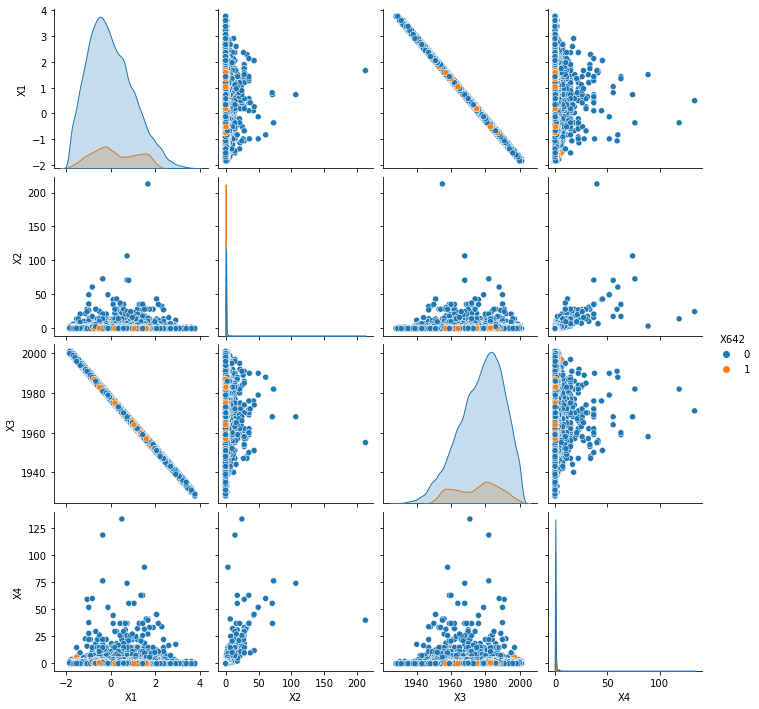

In [165]:
sns.pairplot(df[['X642','X1','X2','X3','X4']],hue='X642')

### Outliers

Steps in 1.5IQR rule:
1. Finding the median, quartile, and interquartile regions
2. Calculate 1.5*IQR below the first quartile and check for low outliers.
3. Calculate 1.5*IQR above the third quartile and check for outliers.

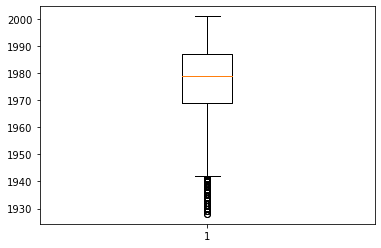

<Figure size 720x504 with 0 Axes>

In [228]:
plt.boxplot(df['X3'])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [222]:
def iqr(col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    outlier = pd.DataFrame(df[col_name].loc[((df[col_name] < (Q1 - 1.5 * IQR)) | 
                                             (df[col_name] > (Q3 + 1.5 * IQR)))==True])
    print(len(outlier))
    return outlier.sort_values(by=col_name).head(10)

In [225]:
iqr('X3')

797


,X3
94615,1928
151803,1928
52213,1929
136798,1929
76483,1929
180602,1929
180927,1929
53565,1930
36,1930
1707,1930


In [184]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier = pd.DataFrame(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum(), columns=['outlier_count'])
outlier['outlier_percent'] = outlier['outlier_count']/len(df)

<ipython-input-184-339d81099a99>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier = pd.DataFrame(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum(), columns=['outlier_count'])
<ipython-input-184-339d81099a99>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier = pd.DataFrame(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum(), columns=['outlier_count'])


In [189]:
outlier

,outlier_count,outlier_percent
X1,785,0.004324
X10,16952,0.093369
X100,822,0.004527
X101,0,0.000000
X102,5907,0.032535
...,...,...
X95,2689,0.014811
X96,9471,0.052165
X97,9840,0.054197
X98,1926,0.010608


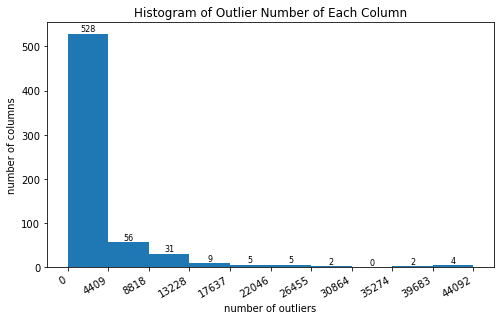

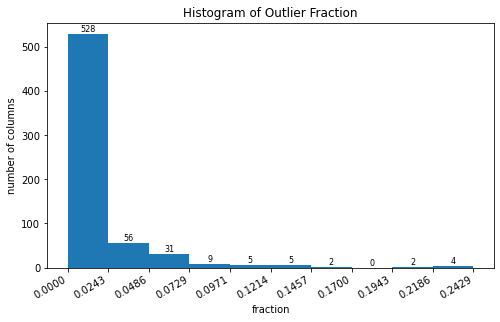

In [186]:
fig, ax = plt.subplots(figsize=(8, 5))
labels, bins, patches = ax.hist(outlier['outlier_count'])
labels = labels.astype(int)
for rect, label in zip(patches, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+1, label, ha="center", va="bottom", size=8)
ax.set_xticks(bins)
fig.autofmt_xdate()
ax.set_title('Histogram of Outlier Number of Each Column')
ax.set_xlabel('number of outliers')
ax.set_ylabel('number of columns')
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
labels, bins, patches = ax.hist(outlier['outlier_percent'])
labels = labels.astype(int)
for rect, label in zip(patches, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+1, label, ha="center", va="bottom", size=8)
ax.set_xticks(bins)
fig.autofmt_xdate()
ax.set_title('Histogram of Outlier Fraction')
ax.set_xlabel('fraction')
ax.set_ylabel('number of columns')
plt.show()

In [226]:
df['X59'].unique()
df['X66'].unique()
df['X85'].unique()

array(['NO', nan, 'YES'], dtype=object)

### Baseline (only binary variables + X1 + X2)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score  
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import IsolationForest

In [102]:
numeric = df.select_dtypes(include=['int64'])
numeric = numeric[numeric.columns[~numeric.isnull().all()]]

In [103]:
numeric['X1'] = df['X1']
numeric['X2'] = df['X2']
numeric

,X640,X641,X642,X3,X10,X12,X13,X14,X15,X16,...,X479,X480,X481,X482,X483,X484,X485,X486,X1,X2
0,1,101,0,1961,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.272695,-0.309136
1,2,102,1,1962,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.194891,-0.309136
2,3,103,1,1953,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.817320,-0.309136
3,4,104,0,1947,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2.361946,-0.344643
4,5,105,0,1959,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.428302,-0.356715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181554,229873,229524,0,1962,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.194891,-0.344643
181555,229874,229525,0,1965,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.961480,-0.238121
181556,229875,229526,1,1960,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.350498,-0.362396
181557,229876,229527,1,1964,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.039284,-0.309136


In [151]:
X_train, X_val, y_train, y_val = train_test_split(numeric.loc[:,numeric.columns!='X642'], 
                                                  numeric['X642'], test_size=0.33, random_state=1)

In [149]:
# iso = IsolationForest(contamination=0.1)
# yhat = iso.fit_predict(X_train)
# mask = yhat != -1
# X_train, y_train = X_train[mask], y_train[mask]

In [152]:
model = LinearRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_val)
mae = mean_absolute_error(y_val, yhat)
print('MAE: %.3f' % mae)

fpr, tpr, thresholds = metrics.roc_curve(y_val, yhat) #pos_label=2)
print('AUC: %.3f' %metrics.auc(fpr, tpr))

MAE: 0.212
AUC: 0.607


In [153]:
model=LogisticRegression(penalty='l2')
model.fit(X_train, y_train)
roc_auc_score(y_val, model.predict_proba(X_val)[:,1])

0.5520549872066343